In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from datetime import datetime
from keras.utils import np_utils
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Draw grid on plot

Using TensorFlow backend.


In [0]:
"""
 That class, Timer checks elasped time for training
"""
class Timer:

  def __init__(self):
    self.start = None
    self.end = None

  def start_timer(self):
    self.start = datetime.now()

  def stop_timer(self):
    self.end = datetime.now()
    return self.end - self.start

In [0]:
def display_history(history):
  h = history.history
  fig, ax = plt.subplots(1,2, figsize = (8,4))
  plt.subplots_adjust(wspace = 0.5)
  fig.suptitle('Training result')

  ax[0].set_title('Accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].plot(h['acc'])
  ax[0].plot(h['val_acc'])
  
  ax[1].set_title('Loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].plot(h['loss'])
  ax[1].plot(h['val_loss'])
  fig.legend(['train','validation'])

In [4]:
model = None
CLASSES = 10 # Number of labels
HIDDENS = 128 # How many neurons(nodes) in hidden layers
EPOCHS = 20 # train dataset is used "EPOCHS" times
BATCH_SIZE = 128 # How many data in the train dataset are used for update of weights one time
VERBOSE = 2 # How expression for training is printed
VALIDATION_SPLIT = 0.2 # How many data in train dataset are used for validation dataset which is not used for training

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# The order depends on the backend of Keras
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    INPUT_SHAPE = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    INPUT_SHAPE = (img_rows, img_cols, 1)

# Data preprocessing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, CLASSES)
Y_test = keras.utils.to_categorical(y_test, CLASSES)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(CLASSES, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         


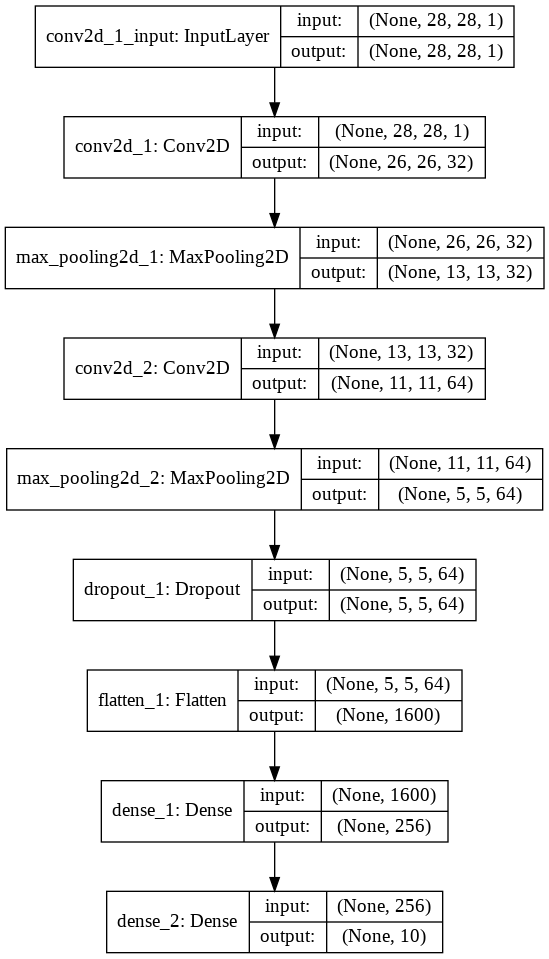

In [8]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/20





 - 17s - loss: 0.2298 - acc: 0.9283 - val_loss: 0.0851 - val_acc: 0.9756
Epoch 2/20
 - 2s - loss: 0.0707 - acc: 0.9774 - val_loss: 0.0488 - val_acc: 0.9858
Epoch 3/20
 - 3s - loss: 0.0498 - acc: 0.9841 - val_loss: 0.0503 - val_acc: 0.9848
Epoch 4/20
 - 2s - loss: 0.0391 - acc: 0.9876 - val_loss: 0.0350 - val_acc: 0.9894
Epoch 5/20
 - 2s - loss: 0.0319 - acc: 0.9894 - val_loss: 0.0359 - val_acc: 0.9901
Epoch 6/20
 - 2s - loss: 0.0273 - acc: 0.9912 - val_loss: 0.0383 - val_acc: 0.9891
Epoch 7/20
 - 2s - loss: 0.0245 - acc: 0.9915 - val_loss: 0.0309 - val_acc: 0.9920
Epoch 8/20
 - 2s - loss: 0.0187 - acc: 0.9939 - val_loss: 0.0336 - val_acc: 0.9902
Epoch 9/20
 - 2s - loss: 0.0163 - acc: 0.9946 - val_loss: 0.0315 - val_acc: 0.9914
Epoch 10/20
 - 2s - loss: 0.0153 - acc: 0.9950 - val_loss: 0.0323 - val_acc: 0.9907
Epoch 11/20
 -

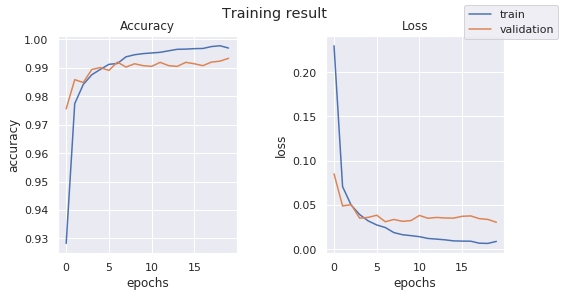

In [10]:
display_history(history)

In [11]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuarcy :',acc)

Accuarcy : 0.9923


In [12]:
K.clear_session()

In [0]:
from keras.datasets import cifar10

CLASSES = 10
LABELS = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
INPUT_SHAPE = (32,32,3)

def display_dataset(X_train, y_train, title):  
  fig, ax = plt.subplots(5, 5, figsize = (10, 10))
  fig.suptitle(title)
  fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
  for y, x in [(j, i) for j in range(5) for i in range(5)]:
    idx = np.random.randint(len(y_test))
    ax[y, x].imshow(X_train[idx])
    ax[y, x].set_title(LABELS[y_train[idx]])
    ax[y, x].axis('off')

def visualize_prediction(X_test,y_test,preds):
  fig, ax = plt.subplots(4, 4, figsize = (10, 10))
  plt.subplots_adjust(hspace = 0.8)
  fig.suptitle('Test')

  for y, x in [(j, i) for j in range(4) for i in range(4)]:
    if y == 2 and x == 0 : # display false prediction
      _X_test = X_test[y_test != preds.argmax(-1)]
      _preds = preds[y_test != preds.argmax(-1)]
      _y_test = y_test[y_test != preds.argmax(-1)]

    elif y == 0 and x == 0 : # display true prediction
      _X_test = X_test[y_test == preds.argmax(-1)]
      _preds = preds[y_test == preds.argmax(-1)]
      _y_test = y_test[y_test == preds.argmax(-1)]
      
      
    idx = np.random.randint(len(_y_test))
    ax[y, x].set_title("true : "+str(LABELS[_y_test[idx]])+"\n pred : " + str(LABELS[_preds[idx].argmax()])+"\n"+str(round(_preds[idx].max(),2)))
    ax[y, x].axis('off')
    ax[y, x].imshow(_X_test[idx])

In [14]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 11s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


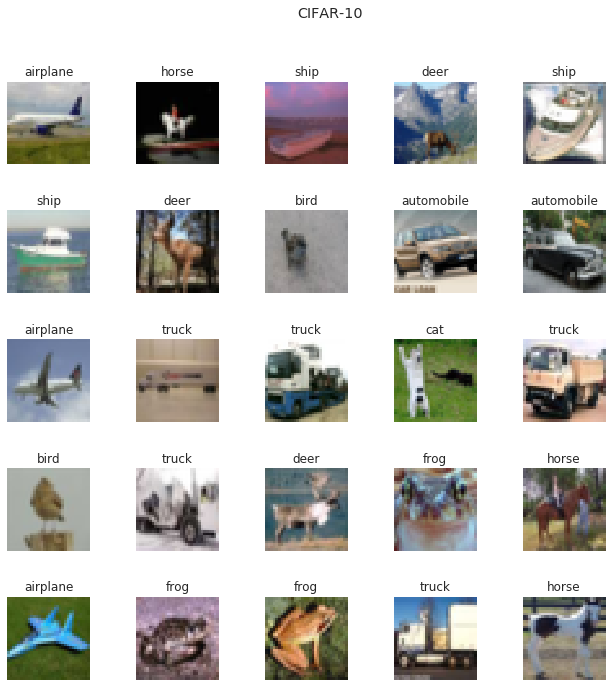

In [15]:
display_dataset(X_train, y_train.reshape(50000),'CIFAR-10')

In [0]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
Y_train = np_utils.to_categorical(y_train, CLASSES)
Y_test = np_utils.to_categorical(y_test, CLASSES)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=INPUT_SHAPE, padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

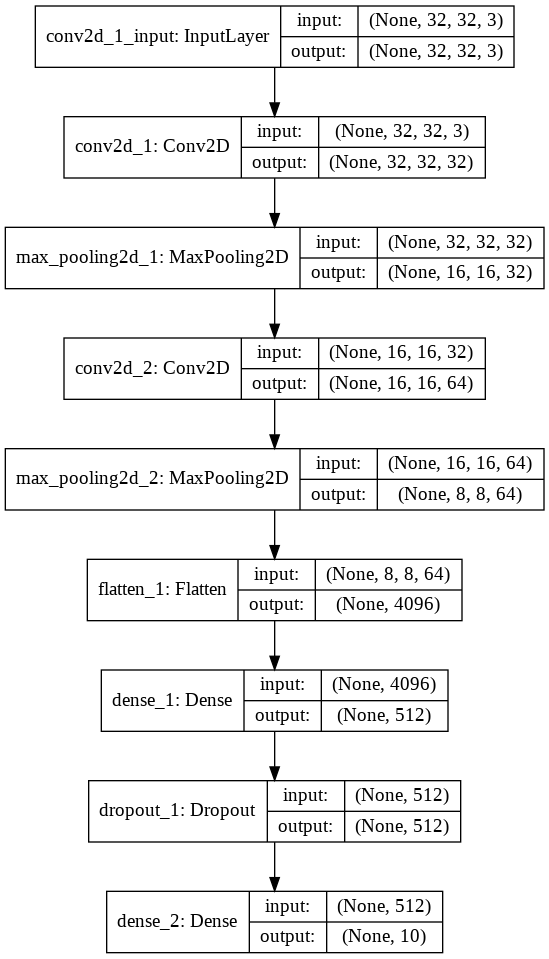

In [18]:
plot_model(model, show_shapes=True)

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 1.6060 - acc: 0.4179 - val_loss: 1.2907 - val_acc: 0.5387
Epoch 2/20
 - 3s - loss: 1.2453 - acc: 0.5559 - val_loss: 1.1001 - val_acc: 0.6186
Epoch 3/20
 - 3s - loss: 1.0902 - acc: 0.6154 - val_loss: 1.0025 - val_acc: 0.6552
Epoch 4/20
 - 3s - loss: 0.9948 - acc: 0.6512 - val_loss: 0.9634 - val_acc: 0.6644
Epoch 5/20
 - 3s - loss: 0.9125 - acc: 0.6796 - val_loss: 0.9058 - val_acc: 0.6900
Epoch 6/20
 - 3s - loss: 0.8511 - acc: 0.7012 - val_loss: 0.8710 - val_acc: 0.6983
Epoch 7/20
 - 3s - loss: 0.7853 - acc: 0.7240 - val_loss: 0.8575 - val_acc: 0.7035
Epoch 8/20
 - 3s - loss: 0.7399 - acc: 0.7406 - val_loss: 0.8452 - val_acc: 0.7143
Epoch 9/20
 - 3s - loss: 0.6949 - acc: 0.7571 - val_loss: 0.8426 - val_acc: 0.7118
Epoch 10/20
 - 3s - loss: 0.6408 - acc: 0.7757 - val_loss: 0.8188 - val_acc: 0.7258
Epoch 11/20
 - 3s - loss: 0.5938 - acc: 0.7922 - val_loss: 0.8562 - val_acc: 0.7132
Epoch 12/20
 - 3s - loss: 0.5515 - 

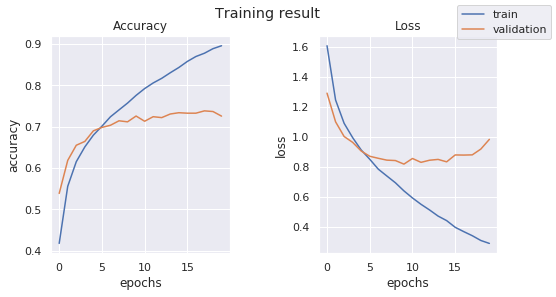

In [20]:
display_history(history)

In [21]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuarcy :',acc)

Accuarcy : 0.7119


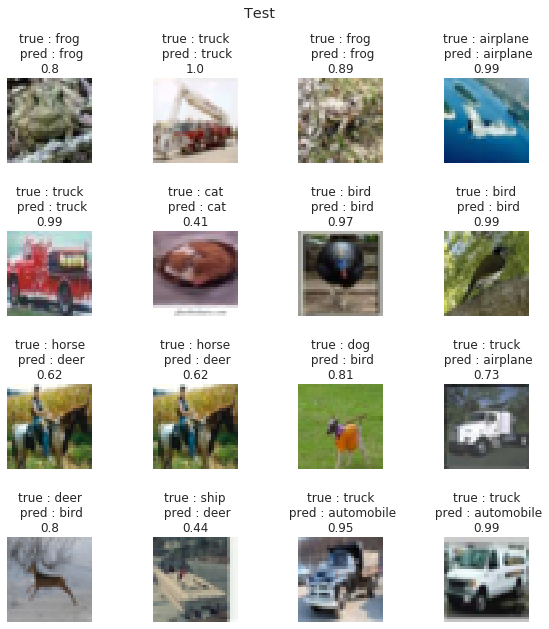

In [22]:
preds = model.predict(X_test)
visualize_prediction(X_test,y_test.reshape(10000),preds)

In [0]:
K.clear_session()

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=INPUT_SHAPE, padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(CLASSES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

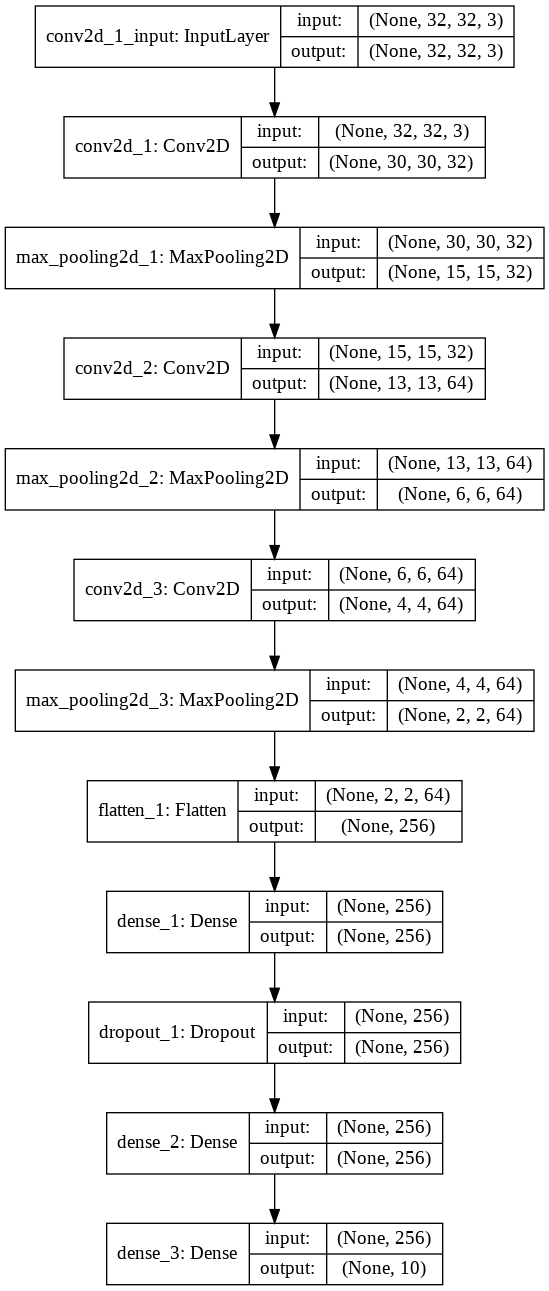

In [25]:
plot_model(model, show_shapes=True)

In [26]:
EPOCHS = 50
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 1.7956 - acc: 0.3263 - val_loss: 1.4880 - val_acc: 0.4489
Epoch 2/50
 - 3s - loss: 1.4290 - acc: 0.4804 - val_loss: 1.2726 - val_acc: 0.5357
Epoch 3/50
 - 3s - loss: 1.2770 - acc: 0.5382 - val_loss: 1.2286 - val_acc: 0.5687
Epoch 4/50
 - 3s - loss: 1.1761 - acc: 0.5766 - val_loss: 1.1387 - val_acc: 0.5934
Epoch 5/50
 - 3s - loss: 1.1095 - acc: 0.6053 - val_loss: 1.0665 - val_acc: 0.6205
Epoch 6/50
 - 3s - loss: 1.0478 - acc: 0.6254 - val_loss: 1.0021 - val_acc: 0.6433
Epoch 7/50
 - 3s - loss: 0.9961 - acc: 0.6467 - val_loss: 0.9633 - val_acc: 0.6569
Epoch 8/50
 - 3s - loss: 0.9509 - acc: 0.6661 - val_loss: 0.9901 - val_acc: 0.6436
Epoch 9/50
 - 3s - loss: 0.9045 - acc: 0.6800 - val_loss: 0.9080 - val_acc: 0.6824
Epoch 10/50
 - 3s - loss: 0.8667 - acc: 0.6946 - val_loss: 0.8902 - val_acc: 0.6843
Epoch 11/50
 - 3s - loss: 0.8499 - acc: 0.7024 - val_loss: 0.9067 - val_acc: 0.6834
Epoch 12/50
 - 3s - loss: 0.8186 - 

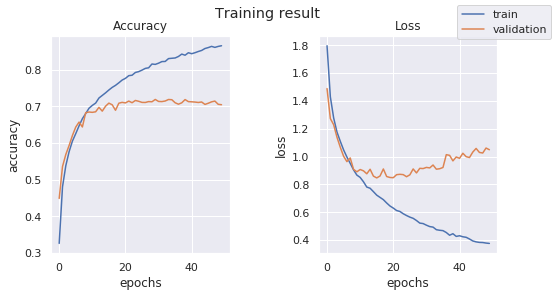

In [27]:
display_history(history)

In [28]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.7035


In [29]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid',
input_shape= INPUT_SHAPE, activation = 'relu'))
model.add(Conv2D(32, (3, 3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='valid', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

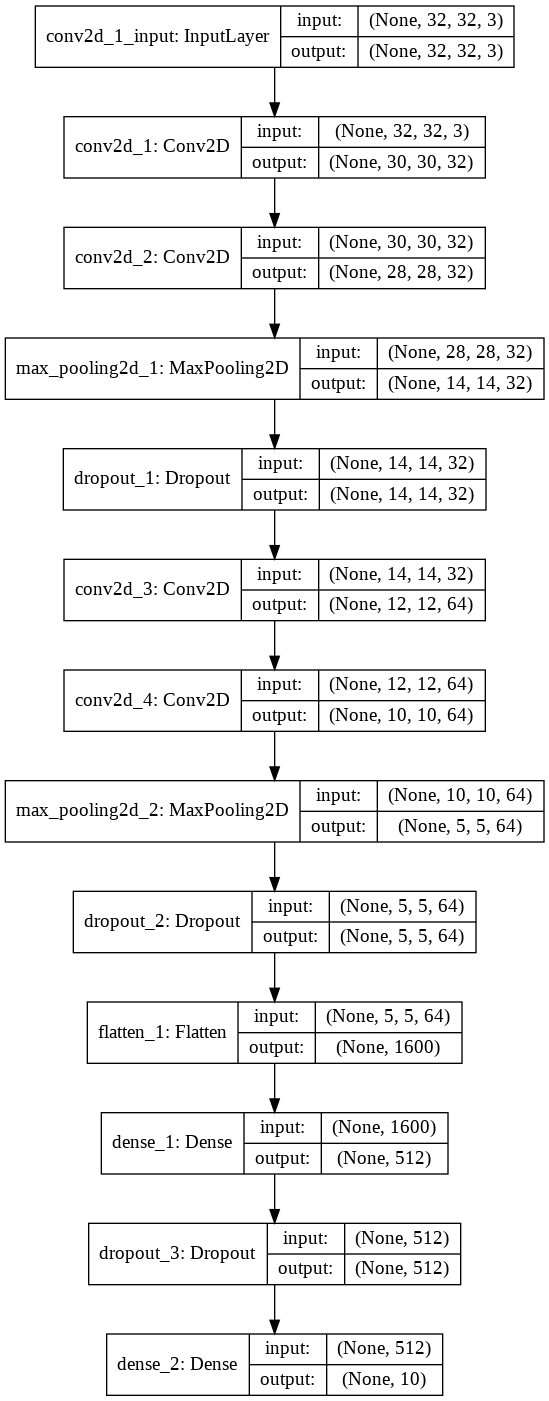

In [30]:
plot_model(model, show_shapes=True)

In [31]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 4s - loss: 1.7163 - acc: 0.3625 - val_loss: 1.3900 - val_acc: 0.4937
Epoch 2/50
 - 4s - loss: 1.3429 - acc: 0.5134 - val_loss: 1.2241 - val_acc: 0.5582
Epoch 3/50
 - 4s - loss: 1.1794 - acc: 0.5799 - val_loss: 1.0227 - val_acc: 0.6379
Epoch 4/50
 - 4s - loss: 1.0527 - acc: 0.6246 - val_loss: 0.9248 - val_acc: 0.6782
Epoch 5/50
 - 4s - loss: 0.9659 - acc: 0.6585 - val_loss: 0.8774 - val_acc: 0.6908
Epoch 6/50
 - 4s - loss: 0.8969 - acc: 0.6827 - val_loss: 0.8516 - val_acc: 0.7012
Epoch 7/50
 - 4s - loss: 0.8392 - acc: 0.7051 - val_loss: 0.7703 - val_acc: 0.7274
Epoch 8/50
 - 4s - loss: 0.7939 - acc: 0.7204 - val_loss: 0.7597 - val_acc: 0.7389
Epoch 9/50
 - 4s - loss: 0.7513 - acc: 0.7369 - val_loss: 0.7235 - val_acc: 0.7518
Epoch 10/50
 - 4s - loss: 0.7227 - acc: 0.7451 - val_loss: 0.7410 - val_acc: 0.7451
Epoch 11/50
 - 4s - loss: 0.6873 - acc: 0.7570 - val_loss: 0.6902 - val_acc: 0.7617
Epoch 12/50
 - 4s - loss: 0.6543 - 

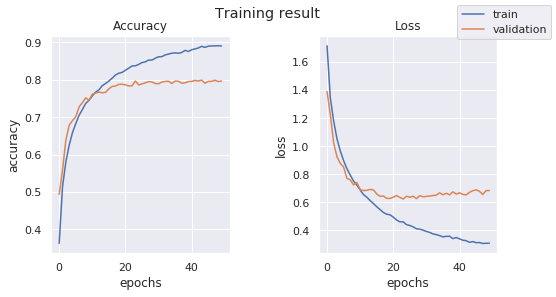

In [32]:
display_history(history = history)

In [33]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.7872
